In [1]:
from os import O_TRUNC
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image

import prediccion

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from statistics import mean



df = pd.DataFrame(pd.read_csv('mobile_price.csv'))
algoPrediccion = prediccion.ClasificacionModelo(df)
algoPrediccion.df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [2]:
algoPrediccion.definirConjuntoDeVariablesIndependientesYDependientes('price_range')
algoPrediccion.X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [3]:
algoPrediccion.Y

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


In [4]:
algoPrediccion.divisionDeConjuntos()


shape X_train (1600, 20)
shape X_test (400, 20)
shape y_train (1600, 1)
shape y_test (400, 1)


In [5]:
algoPrediccion.X.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')>

In [6]:
algoPrediccion.escalarConjuntoX()

In [7]:
algoPrediccion.X_test

array([[ 0.50069734,  1.03563452, -1.27055019, ...,  0.56483953,
         1.01384584, -1.02532046],
       [-0.31837695,  1.03563452, -1.27055019, ..., -1.77041434,
         1.01384584, -1.02532046],
       [ 0.65908187,  1.03563452,  0.3228083 , ...,  0.56483953,
        -0.98634324,  0.97530483],
       ...,
       [-1.44516975,  1.03563452,  1.3033366 , ..., -1.77041434,
         1.01384584,  0.97530483],
       [ 0.99621466,  1.03563452,  0.07767623, ..., -1.77041434,
        -0.98634324, -1.02532046],
       [ 0.12962501, -0.96559161, -1.27055019, ..., -1.77041434,
         1.01384584,  0.97530483]])

In [8]:
algoPrediccion.X_train

array([[-1.60788581e-03, -9.65591606e-01,  1.67103471e+00, ...,
         5.64839529e-01, -9.86343245e-01, -1.02532046e+00],
       [ 1.37407489e+00, -9.65591606e-01, -1.27055019e+00, ...,
        -1.77041434e+00, -9.86343245e-01, -1.02532046e+00],
       [ 1.03920474e+00, -9.65591606e-01,  6.90506414e-01, ...,
         5.64839529e-01,  1.01384584e+00,  9.75304830e-01],
       ...,
       [-9.66386040e-02, -9.65591606e-01,  5.67940376e-01, ...,
        -1.77041434e+00, -9.86343245e-01,  9.75304830e-01],
       [-9.43759679e-02, -9.65591606e-01,  1.05820453e+00, ...,
         5.64839529e-01,  1.01384584e+00,  9.75304830e-01],
       [-1.19175450e+00, -9.65591606e-01, -1.27055019e+00, ...,
         5.64839529e-01, -9.86343245e-01,  9.75304830e-01]])

In [9]:
algoPrediccion.entrenar()


In [10]:
algoPrediccion.prediccion()

In [11]:
algoPrediccion.resultadoDeEntrenamiento()

,Actual,Prediccion,Error Absoluto,Error porcentual absoluto %
0,3,3,0,0.00
1,0,0,0,0.00
2,2,2,0,0.00
3,2,2,0,0.00
4,2,3,1,50.00
...,...,...,...,...
395,1,1,0,0.00
396,1,1,0,0.00
397,0,0,0,0.00
398,2,2,0,0.00


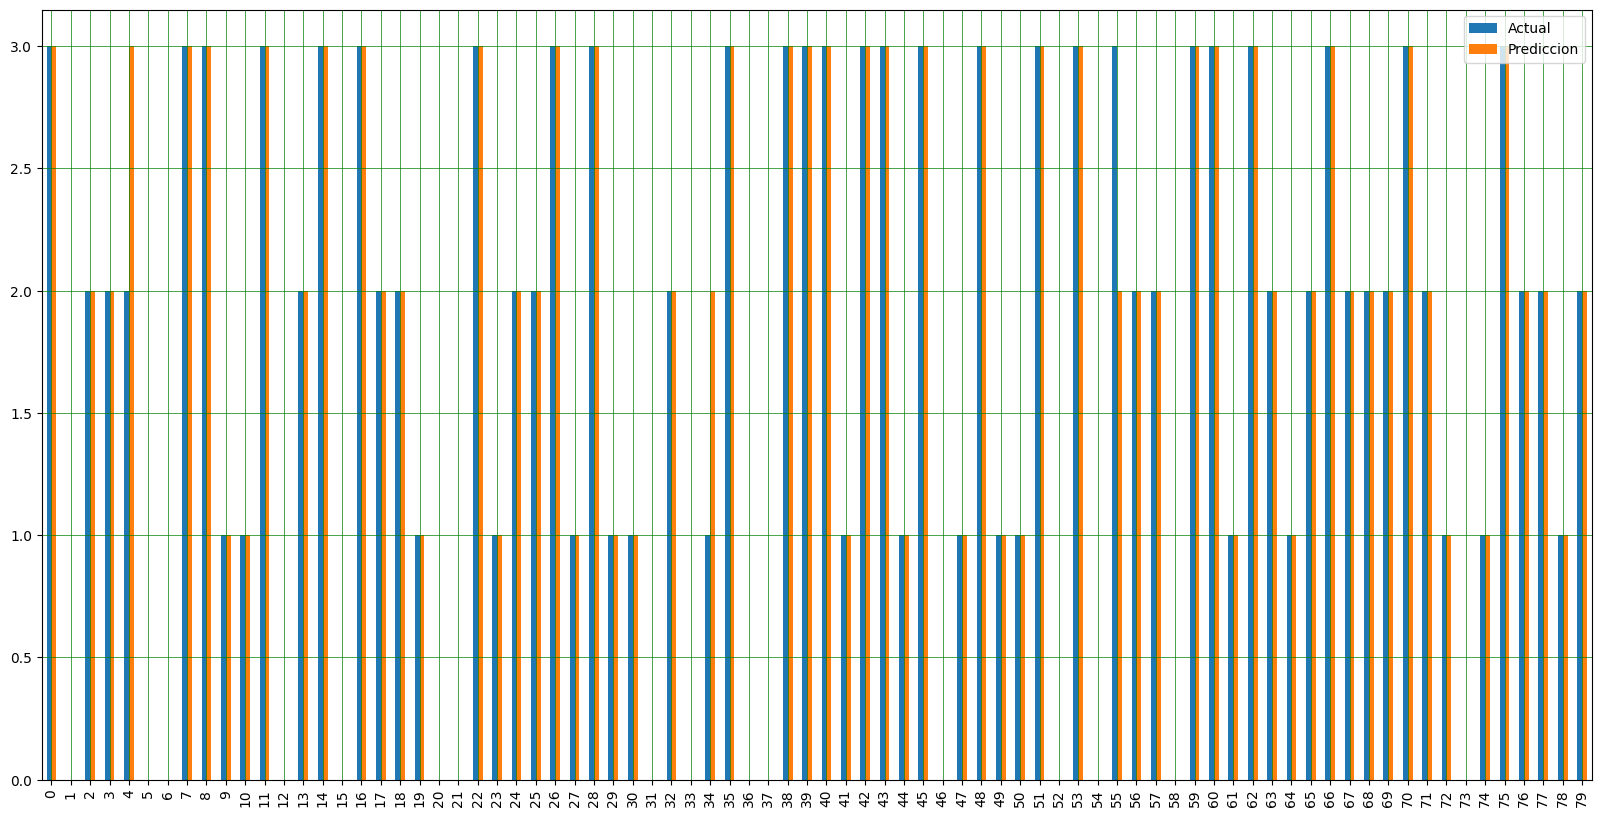

In [12]:
algoPrediccion.graficoComparativoBarras()

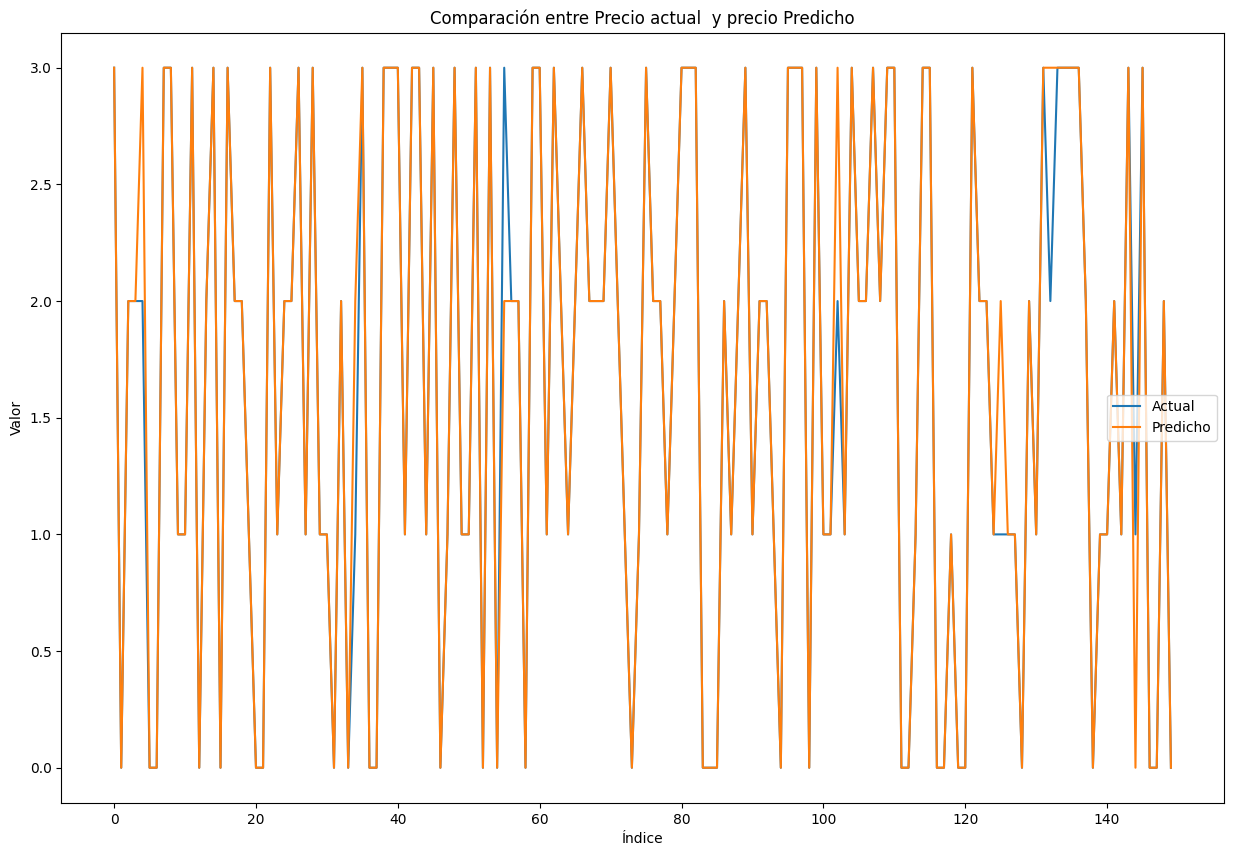

In [13]:
algoPrediccion.graficoComparativoLineas()

[[ 93   2   0   0]
 [  2  85   5   0]
 [  0   3  91   5]
 [  0   0   1 113]]


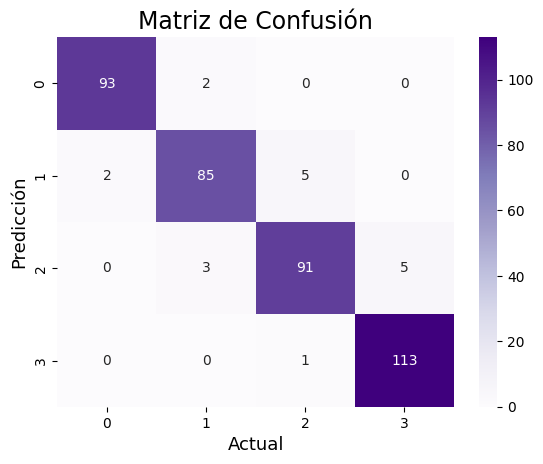

In [14]:
algoPrediccion.graficoMatrizDeConfusion()

In [15]:
algoPrediccion.metricas()

error absoluto porcentaje : 3.0
error absoluto efectividad : 97.0
              precision    recall  f1-score   support

           0     0.9789    0.9789    0.9789        95
           1     0.9444    0.9239    0.9341        92
           2     0.9381    0.9192    0.9286        99
           3     0.9576    0.9912    0.9741       114

    accuracy                         0.9550       400
   macro avg     0.9548    0.9533    0.9539       400
weighted avg     0.9548    0.9550    0.9548       400



# Resolucion De Conflictos pendientes

# Eliminacion hacia atras

In [16]:
algoPrediccion.regresionOLSResultados()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            price_range   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              2463.
Date:                Sun, 18 Jun 2023   Prob (F-statistic):                        0.00
Time:                        15:29:01   Log-Likelihood:                         -837.39
No. Observations:                2000   AIC:                                      1715.
Df Residuals:                    1980   BIC:                                      1827.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
battery_power     0.0004   1.79e-05     20.864      0.000       0.000       0.000
blue             -0.0395      0.017     -2.390      0.017      -0.072      -0.007
clock_speed      -0.0649      0.010     -6.572      0.000      -0.084      -0.046
dual_sim         -0.0795      0.016     -4.838      0.000      -0.112      -0.047
fc                0.0007      0.002      0.261      0.794      -0.004       0.006
four_g           -0.0034      0.020     -0.164      0.870      -0.043       0.037
int_memory       -0.0013      0.000     -3.013      0.003      -0.002      -0.000
m_dep            -0.1295      0.028     -4.585      0.000      -0.185      -0.074
mobile_wt        -0.0034      0.000    -16.284      0.000      -0.004      -0.003
n_cores          -0.0180      0.004     -5.127      0.000      -0.025      -0.011
pc               -0.0047      0.002     -2.673      0.008      -0.008      -0.001
px_height         0.0003   2.18e-05     12.994      0.000       0.000       0.000
px_width          0.0001   2.14e-05      6.513      0.000    9.75e-05       0.000
ram               0.0009    7.5e-06    121.780      0.000       0.001       0.001
sc_h             -0.0156      0.002     -7.258      0.000      -0.020      -0.011
sc_w              0.0017      0.002      0.753      0.451      -0.003       0.006
talk_time        -0.0072      0.001     -4.853      0.000      -0.010      -0.004
three_g          -0.0697      0.024     -2.956      0.003      -0.116      -0.023
touch_screen     -0.0545      0.016     -3.314      0.001      -0.087      -0.022
wifi             -0.0628      0.017     -3.806      0.000      -0.095      -0.030
==============================================================================
Omnibus:                       21.506   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.084
Skew:                           0.042   Prob(JB):                     0.000874
Kurtosis:                       2.597   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
algoPrediccion.todosLosP()

,P-Values,P>0.05
battery_power,0.000,False
blue,0.017,False
clock_speed,0.000,False
dual_sim,0.000,False
fc,0.794,True
four_g,0.870,True
int_memory,0.003,False
m_dep,0.000,False
mobile_wt,0.000,False
n_cores,0.000,False


In [18]:
algoPrediccion.todosLosPQueSuperaAlSL()

,P-Values,P>0.05
fc,0.794,True
four_g,0.870,True
sc_w,0.451,True


In [19]:
algoPrediccion.obtenerListaDeVariablesIndQueSuperanAlLS()

['fc', 'four_g', 'sc_w']

In [20]:
algoPrediccion.eliminarColumnasQueSuperenAlSL()

In [21]:
algoPrediccion.X

,battery_power,blue,clock_speed,dual_sim,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,talk_time,three_g,touch_screen,wifi
0,842,0,2.20,0,7,0.60,188,2,2,20,756,2549,9,19,0,0,1
1,1021,1,0.50,1,53,0.70,136,3,6,905,1988,2631,17,7,1,1,0
2,563,1,0.50,1,41,0.90,145,5,6,1263,1716,2603,11,9,1,1,0
3,615,1,2.50,0,10,0.80,131,6,9,1216,1786,2769,16,11,1,0,0
4,1821,1,1.20,0,44,0.60,141,2,14,1208,1212,1411,8,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.50,1,2,0.80,106,6,14,1222,1890,668,13,19,1,1,0
1996,1965,1,2.60,1,39,0.20,187,4,3,915,1965,2032,11,16,1,1,1
1997,1911,0,0.90,1,36,0.70,108,8,3,868,1632,3057,9,5,1,1,0
1998,1512,0,0.90,0,46,0.10,145,5,5,336,670,869,18,19,1,1,1


In [22]:
algoPrediccion.realizarEntrenamientoCompletoSinEliminacionHaciaAtras()

shape X_train (1600, 17)
shape X_test (400, 17)
shape y_train (1600, 1)
shape y_test (400, 1)


In [23]:
algoPrediccion.resultadoDeEntrenamiento()

,Actual,Prediccion,Error Absoluto,Error porcentual absoluto %
0,3,3,0,0.00
1,0,0,0,0.00
2,2,2,0,0.00
3,2,2,0,0.00
4,2,3,1,50.00
...,...,...,...,...
395,1,1,0,0.00
396,1,1,0,0.00
397,0,0,0,0.00
398,2,2,0,0.00


[[ 93   2   0   0]
 [  2  86   4   0]
 [  0   5  89   5]
 [  0   0   2 112]]


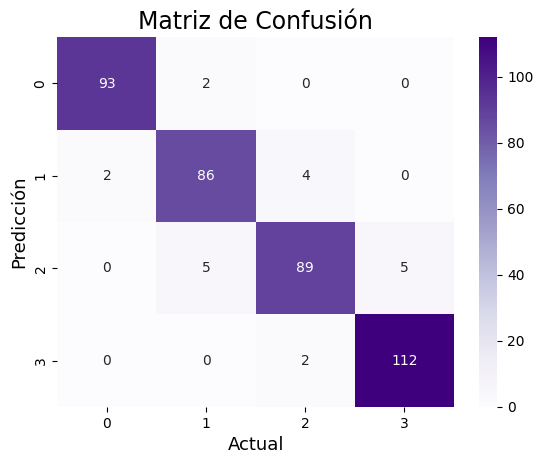

In [24]:
algoPrediccion.graficoMatrizDeConfusion()

In [25]:
algoPrediccion.metricas()

error absoluto porcentaje : 3.3333333333333335
error absoluto efectividad : 96.66666666666667
              precision    recall  f1-score   support

           0     0.9789    0.9789    0.9789        95
           1     0.9247    0.9348    0.9297        92
           2     0.9368    0.8990    0.9175        99
           3     0.9573    0.9825    0.9697       114

    accuracy                         0.9500       400
   macro avg     0.9494    0.9488    0.9490       400
weighted avg     0.9499    0.9500    0.9498       400



|           | precision | recall | f1-score | support |
|-----------|-----------|--------|----------|---------|
|     0     |   0.98    |  0.98  |   0.98   |    95   |
|     1     |   0.94    |  0.92  |   0.93   |    92   |
|     2     |   0.94    |  0.92  |   0.93   |    99   |
|     3     |   0.96    |  0.99  |   0.97   |   114   |
|-----------|-----------|--------|----------|---------|
| accuracy  |           |        |   0.95   |   400   |
|-----------|-----------|--------|----------|---------|
| macro avg |   0.95    |  0.95  |   0.95   |   400   |
|weighted avg|  0.95    |  0.95  |   0.95   |   400   |

precision    recall  f1-score   support

           0     0.9789    0.9789    0.9789        95
           1     0.9444    0.9239    0.9341        92
           2     0.9381    0.9192    0.9286        99
           3     0.9576    0.9912    0.9741       114

    accuracy                         0.9550       400
   macro avg     0.9548    0.9533    0.9539       400
weighted avg     0.9548    0.9550    0.9548       400